In [1]:
#importing parkages
import pandas as pd 
import numpy as np

# Import Scikit-learn helper functions

#for Data Segementation
import sklearn
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metric functions
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#to shut warnings from the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data =data.sample(frac = 1)
data = data.fillna(0)
data = data.reset_index(drop = True)
data.head()

,src_ip,src_port,dest_ip,dest_port,protocol,class
0,172.31.86.174,3389.0,51.79.142.247,49457.0,TCP,suricata
1,222.120.157.4,55835.0,172.25.0.2,23.0,telnet,cowrie
2,172.28.0.2,81.0,159.65.48.11,46818.0,httpd,dionaea
3,50.250.38.118,35466.0,172.25.0.2,23.0,telnet,cowrie
4,172.31.86.174,24560.0,141.138.169.216,80.0,TCP,suricata


In [3]:
src_ip = []
dest_ip = []
def ip_clean(x):
    for i in x.src_ip:
        src_ip.append(int(i.replace('.','')))
    for i in x.dest_ip:
        dest_ip.append(int(str(i).replace('.','')))
ip_clean(data)

In [4]:
data['src_ip'] = src_ip
data["dest_ip"] = dest_ip

In [5]:
X = data.loc[ : ,:'protocol']
X= X.fillna(0)
y = data['class']

dataset = X
# change strings to categories
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype('category').cat.as_ordered()
# Turn the categorical columns to numbers and then fill missing
for label, content in X.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn the categories to number and fill missing values with +1 , we are adding +1 because pandas see missing as -ve
        X[label] = pd.Categorical(content).codes + 1
# X["src_ip"], X['dest_ip'] = data['src_ip'],data['dest_ip']
# X= X.fillna(0)

In [6]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [7]:
print(X), print(y)

            src_ip  src_port       dest_ip  dest_port  protocol
0       1723186174    3389.0    5179142247    49457.0         2
1       2221201574   55835.0       1722502       23.0        23
2          1722802      81.0     159654811    46818.0         7
3       5025038118   35466.0       1722502       23.0        23
4       1723186174   24560.0  141138169216       80.0         2
...            ...       ...           ...        ...       ...
6789    1679414658   40692.0     442025388      465.0        19
6790  192241212249   43562.0    1723186174    28017.0        22
6791     220956440   40146.0       1722502       23.0        23
6792  185221194174   45564.0       1722502       23.0        23
6793       1722802      21.0   16724813363    38800.0         5

[6794 rows x 5 columns]
0        suricata
1          cowrie
2         dionaea
3          cowrie
4        suricata
          ...    
6789    heralding
6790    honeytrap
6791       cowrie
6792       cowrie
6793      dionaea
Name: cla

(None, None)

In [8]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
seed = 7

scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('Linear Regrssion', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NN', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
std =[]
for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits=10)
    cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    std.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Linear Regrssion: 0.659085 (0.025828)
KNN: 0.949728 (0.012353)
Decision Tree: 0.998948 (0.001412)
NN: 0.547259 (0.115339)


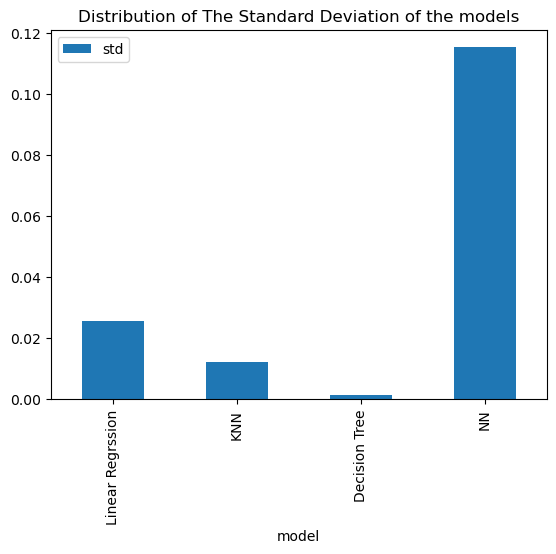


The Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model
Decision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting
The KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%


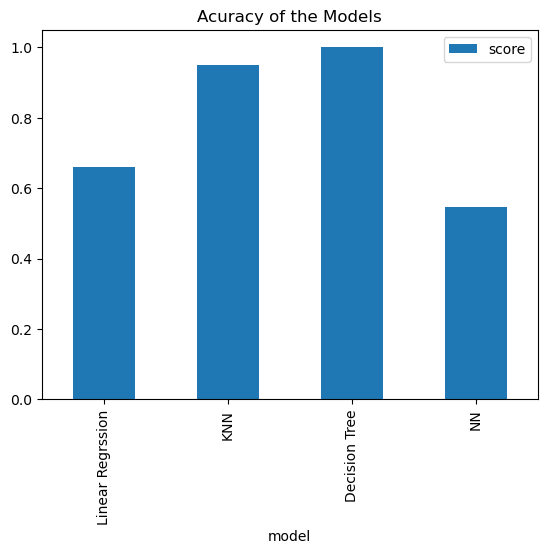

In [10]:
matrix = pd.DataFrame(zip(results, names), columns =['score', 'model'])
matrix['std'] = std
matrix.plot(kind = 'bar', x ='model', y = 'std', title = 'Distribution of The Standard Deviation of the models')
plt.show()
print("\nThe Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model\nDecision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting\nThe KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%")
matrix.plot(kind ='bar', x= 'model', y = 'score', title = 'Acuracy of the Models');

              precision    recall  f1-score   support

      cowrie       0.97      0.98      0.97       522
     dionaea       0.89      0.88      0.89       224
   heralding       0.92      0.95      0.93       207
   honeytrap       0.98      0.97      0.98       599
    suricata       0.94      0.95      0.95       487

    accuracy                           0.95      2039
   macro avg       0.94      0.94      0.94      2039
weighted avg       0.95      0.95      0.95      2039



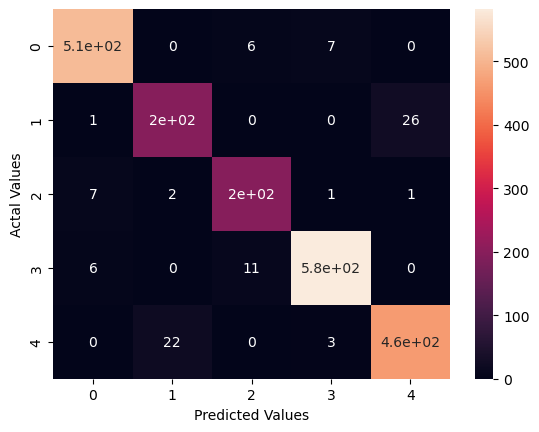

In [11]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test,y_predict))

sns.heatmap(cm, annot = True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [12]:
for model in models:
    model[1].fit(X_train, y_train)
    y_predict = model[1].predict(X_test)
    cm = confusion_matrix(y_test, y_predict)

    print(f'Classification Report for {model[1]}\n\n----------------------------------\n',classification_report(y_test,y_predict))



Classification Report for LogisticRegression()

----------------------------------
               precision    recall  f1-score   support

      cowrie       0.98      0.82      0.89       522
     dionaea       0.89      0.62      0.73       224
   heralding       0.00      0.00      0.00       207
   honeytrap       0.53      0.76      0.63       599
    suricata       0.57      0.69      0.63       487

    accuracy                           0.67      2039
   macro avg       0.59      0.58      0.58      2039
weighted avg       0.64      0.67      0.64      2039

Classification Report for KNeighborsClassifier()

----------------------------------
               precision    recall  f1-score   support

      cowrie       0.97      0.98      0.97       522
     dionaea       0.89      0.88      0.89       224
   heralding       0.92      0.95      0.93       207
   honeytrap       0.98      0.97      0.98       599
    suricata       0.94      0.95      0.95       487

    accuracy   

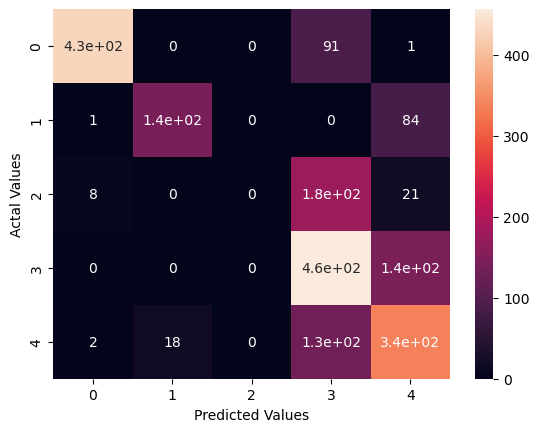

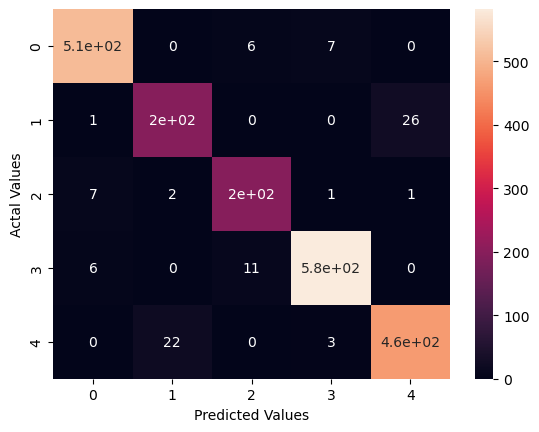

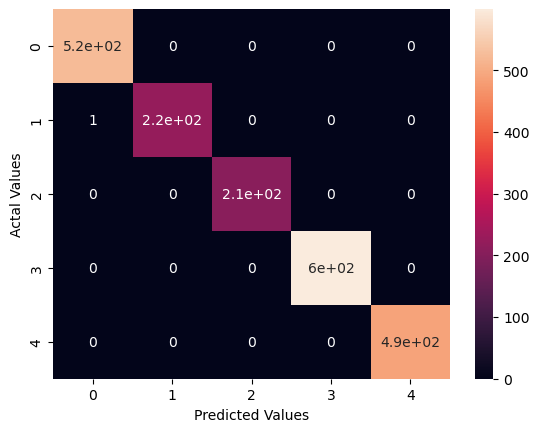

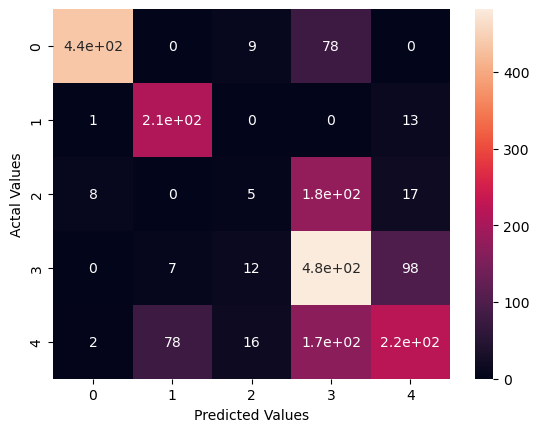

In [13]:
for model in models:
    model[1].fit(X_train, y_train)
    y_predict = model[1].predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot = True)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

#     print(f'Classification Report for {model[1]}\n\n----------------------------------\n',classification_report(y_test,y_predict))


